# **Python para Finanças**
*por [Heric Saliby - Sigmoidal](https://escola.sigmoidal.ai/curso-python-do-zero/)*

---

<h1>Análise Financeira </h1>

Aplicações possíveis para Python e Finanças 

Seja para extrair informações de portais de investimento, analisar dados ou usar a Inteligência Artificial para decidir pontos de compra e venda, aprender Python no mundo dos investimentos é a decisão mais inteligente que você poderia ter.

<center><img src="https://www.thepythoncode.com/media/articles/introduction-to-finance-and-technical-indicators-with-python.jpg" height="400px"></center>



### Importar arquivos `csv` com as cotações do BPAC11.SA

Pelo site [Yahoo Finance](https://finance.yahoo.com/quote/BPAC11.SA?p=BPAC11.SA&.tsrc=fin-srch), baixei os dados da ação ordinária do Banco BTG Pactual S.A. (BPAC11) em formato `csv` e disponibilizei o arquivo [neste link](https://raw.githubusercontent.com/hericsaliby/DataScience_Projects/main/BPAC11.SA.csv)



Importar esse mesmo arquivo usando o Pandas é tão simples quanto executar a função `pd.read_csv("local_do_arquivo.csv")`, informando qual o endereço que o `csv` se encontra (endereço na internet ou caminho na máquina local).


Vamos supor que você está usando um arquivo csv que se encontra no endereço ```https://raw.githubusercontent.com/hericsaliby/DataScience_Projects/main/BPAC11.SA.csv``` e quer baixar o mesmo:

In [5]:
# baixar o arquivo BBAS3.SA.csv
!wget https://raw.githubusercontent.com/hericsaliby/DataScience_Projects/main/BPAC11.SA.csv
  
# ver o diretório
!ls -l

--2022-06-01 22:43:42--  https://raw.githubusercontent.com/hericsaliby/DataScience_Projects/main/BPAC11.SA.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17439 (17K) [text/plain]
Saving to: ‘BPAC11.SA.csv.1’

BPAC11.SA.csv.1     100%[===================>]  17.03K  --.-KB/s    in 0s      

2022-06-01 22:43:42 (46.6 MB/s) - ‘BPAC11.SA.csv.1’ saved [17439/17439]

total 44
-rw-r--r-- 1 root root 17439 Jun  1 22:43 BPAC11.SA.csv
-rw-r--r-- 1 root root 17439 Jun  1 22:43 BPAC11.SA.csv.1
drwxr-xr-x 1 root root  4096 May 17 13:39 sample_data


Pronto! O arquivo `BPAC11.SA.csv` foi importado com sucesso e já está pronto para ser usado neste *notebook*. 

### Conhecendo os componentes básicos do Pandas

Os dois componentes básicos que a gente deve conhecer quando lidando com Pandas são `Series` e `DataFrame`. 

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/componentes_pandas.png"></center>

Simplificadamente, você pode pensar o `DataFrame` como sendo uma planilha de Excel, e `Series` como sendo apenas uma coluna individual.

Apesar de parecer conceitualmente simples, estas duas estruturas nativas do Pandas facilitam muito o trabalho com dados, uma vez que elas podem armazenar qualquer tipo de dado.

In [6]:
# importar os pacotes necessários 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# importar planilha do drive
df = pd.read_csv("/content/BPAC11.SA.csv")

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,25.628250,26.127490,25.082910,25.579720,25.362081,1.182196e+07
std,3.583287,3.536983,3.558648,3.572157,3.435711,5.422643e+06
min,18.440001,18.709999,18.030001,18.459999,18.459999,2.918600e+06
25%,23.002500,23.582500,22.517500,22.885001,22.735001,8.364975e+06
50%,24.990000,25.555000,24.560000,25.115001,25.115001,1.095075e+07
75%,28.730000,29.292500,28.207500,28.720000,28.406018,1.357212e+07
max,32.250000,32.730000,31.520000,32.270000,31.734743,4.654720e+07


In [9]:
df['Volume'].std()

5422643.342304278

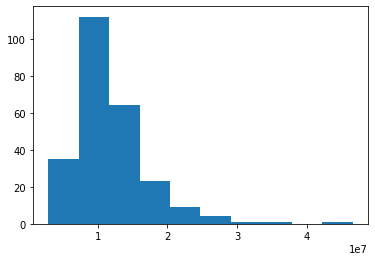

In [10]:
plt.hist(df['Volume'], bins=10);

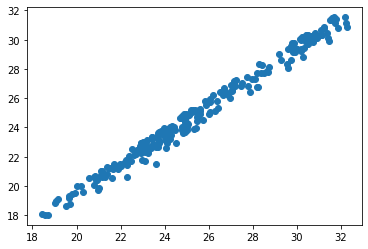

In [11]:
plt.scatter(df["Open"], df["Low"])

plt.savefig('sigmoidal.png')

## Bibliotecas para Análise Financeira

Apesar de termos muitas opções de bibliotecas em Python para analisar dados e operar no Mercado, infelizmento o Brasil ainda oferece bem menos alternativas que países como os Estados Unidos.

Claro, isso se dá pelo volume relativo e pela própria maturidade do Mercado. Mas como esse ecossistema é um organismo vivo, em constante evolução, eu recomendo a todos que sempre mantenham uma rotina de pesquisa e estudos, pois isso vai permitir você identificar qualquer novidade ou ferramenta que facilite as suas análises.


### Baixando as cotaçãos do Yahoo Finance com a biblioteca `yfinance`

Umas das bibliotecas mais fáceis e diretas de usar, é a `yfinance`, que fornece *features* como preços de abertura, fechamento, fechamento ajustado, máxima, mínima e voluma, bastando que o usuário do serviço informe o símbolo da ação.

Vale ressaltar que ela não está instalada por padrão no Google Colab, sendo necessária a sua instalação.

In [71]:
# instalar biblioteca que não acompanha o Colab por padrão
!pip install yfinance -q

In [13]:
# importar a biblioteca yfinance
import yfinance as yf

In [14]:
bpac11 = yf.Ticker('BPAC11.SA')

In [15]:
# pegar os dados históricos de mercado
hist = bpac11.history(period="max")

In [16]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-02-24,3.762056,3.762056,3.762056,3.762056,5200,0.0,0.0
2017-03-01,3.762056,3.762056,3.710380,3.710380,17200,0.0,0.0
2017-03-02,3.710380,3.710380,3.710380,3.710380,0,0.0,0.0
2017-03-03,3.927422,3.927422,3.824069,3.875745,7200,0.0,0.0
2017-03-06,3.886080,4.030774,3.824068,3.968763,22800,0.0,0.0


In [17]:
# mostrar dividendos, splits
bpac11.actions

,Dividends,Stock Splits
Date,,
2017-07-06,0.171748,0.0
2018-01-05,0.171322,0.0
2018-08-14,0.168363,0.0
2019-01-08,0.173165,0.0
2019-08-09,0.178751,0.0
2020-01-07,0.155105,0.0
2020-07-23,0.147362,0.0
2021-01-07,0.155656,0.0
2021-07-01,0.000000,4.0


In [18]:
# ver informações da ação
bpac11.info

{'52WeekChange': -0.17164057,
 'SandP52WeekChange': -0.018053174,
 'address1': 'Av. Brigadeiro Faria Lima, 3.477',
 'address2': '14th Floor PAtio Victor Malzoni - Itaim Bibi',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 24.85,
 'askSize': 0,
 'averageDailyVolume10Day': 9964840,
 'averageVolume': 10720168,
 'averageVolume10days': 9964840,
 'beta': 1.67935,
 'beta3Year': None,
 'bid': 24.83,
 'bidSize': 0,
 'bookValue': 3.416,
 'category': None,
 'circulatingSupply': None,
 'city': 'São Paulo',
 'companyOfficers': [],
 'country': 'Brazil',
 'currency': 'BRL',
 'currentPrice': 24.84,
 'currentRatio': None,
 'dateShortInterest': None,
 'dayHigh': 25.5,
 'dayLow': 24.77,
 'debtToEquity': None,
 'dividendRate': 0.22,
 'dividendYield': 0.0086,
 'earningsGrowth': 0.6,
 'earningsQuarterlyGrowth': 0.651,
 'ebitda': None,
 'ebitdaMargins': 0,
 'enterpriseToEbitda': None,
 'enterpriseToRevenue': 17.411,
 'enterpriseValue': 365996048384,
 'exDivid

In [19]:
bpac11.financials

,2017-12-31,2016-12-31,2015-12-31,2014-12-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,1088810000.0,4473007000.0,2303143000.0,3066887000.0
Minority Interest,128286000.0,125473000.0,229370000.0,592757000.0
Net Income,2383863000.0,3408583000.0,5623498000.0,3369246000.0
Selling General Administrative,2385309000.0,4532971000.0,5261092000.0,3002049000.0
Gross Profit,5487472000.0,9506319000.0,3863700000.0,5602465000.0
Ebit,0.0,0.0,0.0,0.0
Operating Income,851881000.0,4049053000.0,-2502887000.0,2448457000.0
Other Operating Expenses,2250282000.0,924295000.0,1105495000.0,151959000.0


In [20]:
#informaçao por trimestre
bpac11.quarterly_financials

,2018-03-31,2017-12-31,2017-09-30,2017-06-30
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,759136000.0,571934000.0,-729035000.0,253635000.0
Minority Interest,166391000.0,128286000.0,140439000.0,137919000.0
Net Income,600358000.0,660379000.0,500859000.0,502558000.0
Selling General Administrative,594461000.0,634886000.0,664731000.0,507872000.0
Gross Profit,1481313000.0,1366149000.0,1670070000.0,765806000.0
Ebit,0.0,0.0,0.0,0.0
Operating Income,760704000.0,534898000.0,-775577000.0,155117000.0
Other Operating Expenses,126148000.0,196365000.0,1780916000.0,102817000.0


In [21]:
# Holders Majoritários
bpac11.major_holders

,0,1
0,0.00%,% of Shares Held by All Insider
1,22.07%,% of Shares Held by Institutions
2,22.07%,% of Float Held by Institutions
3,407,Number of Institutions Holding Shares


In [22]:
#Holders Institucionais
bpac11.institutional_holders

In [23]:
#Balanço Patrimonial
bpac11.balance_sheet

,2017-12-31,2016-12-31,2015-12-31,2014-12-31
Intangible Assets,1.694820e+08,1.744500e+08,4.922240e+08,2.137100e+08
Total Liab,1.079355e+11,9.391886e+10,2.346060e+11,1.473368e+11
Total Stockholder Equity,1.852781e+10,1.772722e+10,1.971326e+10,1.473333e+10
Minority Interest,1.282860e+08,1.254730e+08,2.293700e+08,5.927570e+08
Other Current Liab,1.759478e+10,2.048852e+10,3.734152e+10,1.672722e+10
Total Assets,1.265916e+11,1.117716e+11,2.545487e+11,1.626629e+11
Common Stock,7.392092e+09,7.220526e+09,7.180526e+09,6.406863e+09
Other Current Assets,8.227090e+09,9.609674e+09,1.892069e+10,6.824138e+09
Retained Earnings,1.046128e+10,9.885256e+09,1.252152e+10,8.286022e+09
Other Liab,6.122481e+09,4.060240e+09,5.546463e+09,3.391965e+09


In [24]:
bpac11.quarterly_balance_sheet

,2018-03-31,2017-12-31,2017-09-30,2017-06-30
Intangible Assets,1.781560e+08,1.694820e+08,1.802090e+08,1.806870e+08
Total Liab,1.274652e+11,1.079355e+11,9.496010e+10,1.008960e+11
Total Stockholder Equity,1.870249e+10,1.852781e+10,1.860930e+10,1.807931e+10
Minority Interest,1.663910e+08,1.282860e+08,1.404390e+08,1.379190e+08
Other Current Liab,1.874376e+10,1.759478e+10,1.426643e+10,1.634994e+10
Total Assets,1.463341e+11,1.265916e+11,1.137098e+11,1.191132e+11
Common Stock,7.392092e+09,7.392092e+09,7.220526e+09,7.220526e+09
Other Current Assets,1.704779e+10,8.227090e+09,1.230127e+10,1.175291e+10
Retained Earnings,1.054993e+10,1.046128e+10,1.051722e+10,1.028454e+10
Other Liab,6.027100e+09,6.122481e+09,5.727738e+09,5.491186e+09


In [25]:
#Fluxo de caixa
bpac11.cashflow

,2017-12-31,2016-12-31,2015-12-31,2014-12-31
Investments,9.723260e+08,1.870279e+09,-8.984140e+08,-9.999180e+08
Change To Liabilities,-2.121000e+07,-1.685920e+08,1.392310e+08,-7.207000e+06
Total Cashflows From Investing Activities,1.267275e+09,-1.091328e+10,1.984274e+10,-1.521776e+09
Net Borrowings,-3.409824e+09,-1.201668e+10,-1.559361e+09,7.753655e+09
Total Cash From Financing Activities,-3.738351e+09,-4.849106e+10,-1.076339e+10,8.824392e+09
Change To Operating Activities,9.481709e+09,2.869282e+10,5.142809e+09,7.207700e+08
Net Income,2.383863e+09,3.408583e+09,5.623498e+09,3.369246e+09
Change In Cash,9.227257e+09,-2.445559e+10,1.600703e+10,1.166714e+10
Total Cash From Operating Activities,1.169833e+10,3.494874e+10,6.927689e+09,4.364529e+09
Depreciation,3.218250e+08,4.651220e+08,2.099130e+08,2.427320e+08


In [26]:
#Ganhos
bpac11.earnings

,Revenue,Earnings
Year,,
2014,5602465000,3369246000
2015,3863700000,5623498000
2016,9506319000,3408583000
2017,5487472000,2383863000


In [27]:
#Sustentabilidade
bpac11.sustainability

In [28]:
#Calendario de proximos eventos
bpac11.calendar

,Value
Earnings Date,2022-08-09 11:30:00
Earnings Average,0.49
Earnings Low,0.47
Earnings High,0.5
Revenue Average,4003400000
Revenue Low,3857780000
Revenue High,4149030000


In [29]:
#Noticias relacionadas ao Banco BTG
bpac11.news

[{'link': 'https://finance.yahoo.com/m/145ce57d-024e-4549-9fc8-8ff0c82e2fad/elon-musk-tells-spacex-and.html',
  'providerPublishTime': 1654123067,
  'publisher': 'Engadget',
  'title': 'Elon Musk tells SpaceX and Tesla workers they must return to the office full-time',
  'type': 'STORY',
  'uuid': '145ce57d-024e-4549-9fc8-8ff0c82e2fad'},
 {'link': 'https://finance.yahoo.com/m/3009ffa5-2b47-3bd8-81ad-5ff0ec6cbffa/comcast-makes-morningstar.html',
  'providerPublishTime': 1654122900,
  'publisher': 'TheStreet.com',
  'title': 'Comcast Makes Morningstar List of Undervalued Dividend Stocks',
  'type': 'STORY',
  'uuid': '3009ffa5-2b47-3bd8-81ad-5ff0ec6cbffa'},
 {'link': 'https://finance.yahoo.com/m/7a472d96-e574-3074-9f59-903efdcac351/here%27s-why-salesforce-stock.html',
  'providerPublishTime': 1654122720,
  'publisher': 'Motley Fool',
  'title': "Here's Why Salesforce Stock Surged Today",
  'type': 'STORY',
  'uuid': '7a472d96-e574-3074-9f59-903efdcac351'},
 {'link': 'https://finance.yaho

Para utilizar o recurso de cache, ou seja, armazenar chamadas à API de sessões anteriores, ou mesmo customizar o cabeçalho `User-agent`, utilize o código abaixo (descrito na documentação da biblioteca).

In [70]:
!pip install requests_cache -q
import requests_cache

session = requests_cache.CachedSession('yfinance.cache')
session.headers['User-agent'] = 'my-program/1.0'
ticker = yf.Ticker('bbas3.sa itub4.sa', session=session)

ticker.actions

- BBAS3.SA ITUB4.SA: No data found, symbol may be delisted


[]

Para inicializar vários ativos instanciados em classes `Ticker`, informe os símbolos das ações da seguinte maneira.

In [31]:
tickers = yf.Tickers('bbas3.sa itub3.sa BPAC11.SA')
# returna uma tupla com objetos Ticker

# para acessar cada ativo individual
tickers.tickers['BBAS3.SA'].info
tickers.tickers['ITUB3.SA'].history(period="1mo")
tickers.tickers['BPAC11.SA'].actions

,Dividends,Stock Splits
Date,,
2017-07-06,0.171748,0.0
2018-01-05,0.171322,0.0
2018-08-14,0.168363,0.0
2019-01-08,0.173165,0.0
2019-08-09,0.178751,0.0
2020-01-07,0.155105,0.0
2020-07-23,0.147362,0.0
2021-01-07,0.155656,0.0
2021-07-01,0.000000,4.0


In [32]:
# ace
tickers.symbols

['BBAS3.SA', 'ITUB3.SA', 'BPAC11.SA']

### Portfolio Analytics for Quants (QuantStats)

Essa é uma biblioteca para proceder com análises quantitativas, trazendo profundidade nas análises e métricas de risco.

A biblioteca `quantstats` é composta de 3 módulos principais:

1. `quantstats.stats` - para calcular várias métricas de perfomance, como Índice de Sharpe, Win rate, Volatilidade, etc.

2. `quantstats.plots` - para visualizar performance, drawdowns, rolling statistics, monthly returns, entre outros.

3. `quantstats.reports` - para gerar relatórios de métricas, assim como gerar planilhas que podem ser salvas em um arquivo HTML.

Assim como fizemos com a biblioteca `yfinance`, é necessário proceder com a instalação manual da biblioteca no Colab.

In [33]:
# instalar biblioteca que não acompanha o Colab por padrão
!pip install quantstats -q

     |████████████████████████████████| 41 kB 216 kB/s 


In [34]:
# importar a biblioteca quantstats
import quantstats as qs

In [35]:
# extender as funcionalidades para o Pandas
qs.extend_pandas()

In [36]:
# baixar dados para a ação ITUB3
BTG = qs.utils.download_returns('BPAC11.SA')

In [37]:
# mostrar o índice de sharpe
qs.stats.sharpe(BTG)

0.9873572650863854

In [38]:
# ou usando a funcionalidade extend_pandas
BTG.sharpe()

0.9873572650863854

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


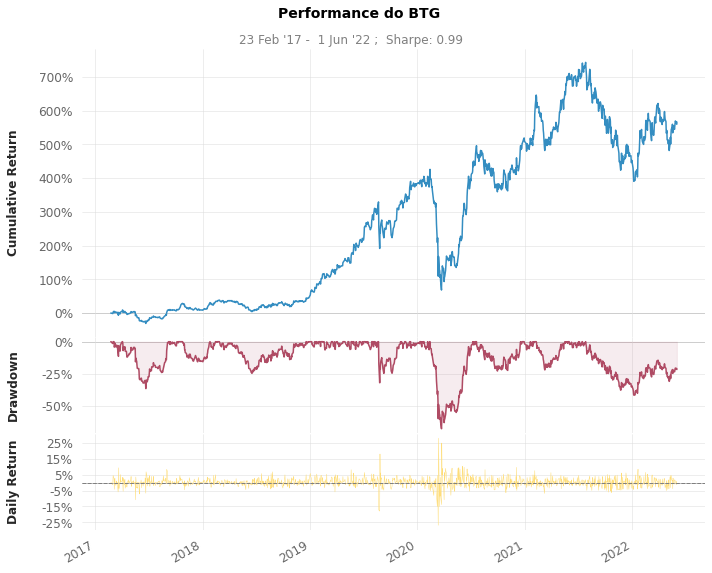

In [39]:
# visualizando a performance de uma ação
qs.plots.snapshot(BTG, title="Performance do BTG")

Uma das funcionalidades mais poderosas da biblioteca `quantstats` é a sua capacidade de gerar relatórios com apenas uma linha de código.

Dentro da ferramenta você encontrará 7 tipos possíveis de relatórios:

1. `qs.reports.metrics(mode='basic', ...)`

2. `qs.reports.metrics(mode='full", ...)`

3. `qs.reports.plots(mode='basic", ...)`

4. `qs.reports.plots(mode='full", ...)`

5. `qs.reports.basic(...)`

6. `qs.reports.full(...)`

7. `qs.reports.html(...)`

Um parâmetro importante que pode ser passado, é o símbolo de um ativo para servir de benchmar.

[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2017-02-24  2017-02-24
End Period                 2022-06-01  2022-06-01
Risk-Free Rate             0.0%        0.0%
Time in Market             96.0%       100.0%

Cumulative Return          560.28%     67.05%
CAGR﹪                     43.08%      10.23%

Sharpe                     0.99        0.51
Prob. Sharpe Ratio         98.68%      87.99%
Smart Sharpe               0.91        0.47
Sortino                    1.48        0.69
Smart Sortino              1.36        0.63
Sortino/√2                 1.05        0.49
Smart Sortino/√2           0.96        0.45
Omega                      1.21        1.21

Max Drawdown               -68.01%     -46.82%
Longest DD Days            309         358
Volatility (ann.)          49.04%      26.41%
R^2                        0.42        0.42
Information Ratio          0.06        0.06
Calmar         

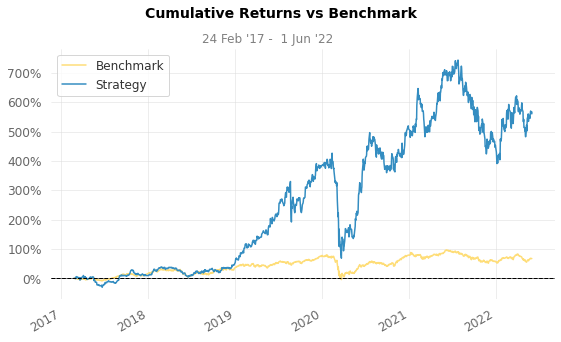

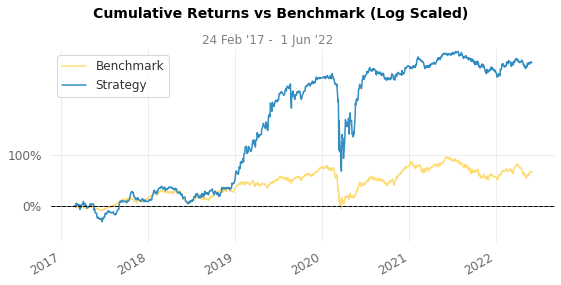

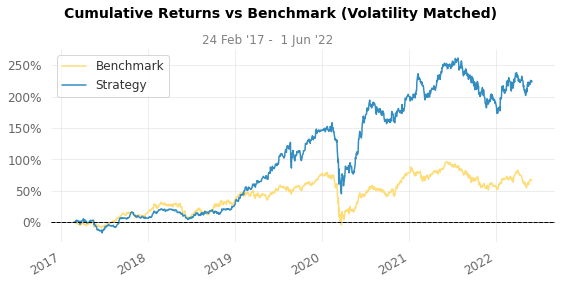

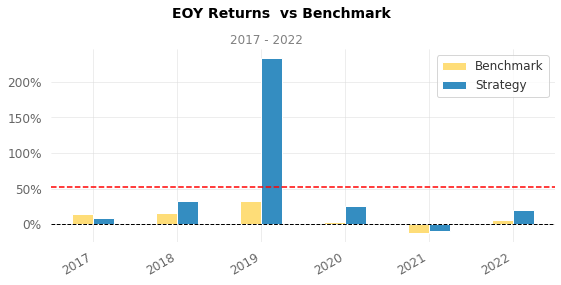

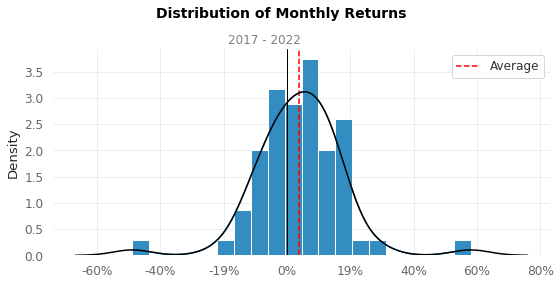

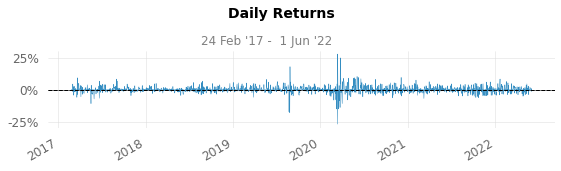

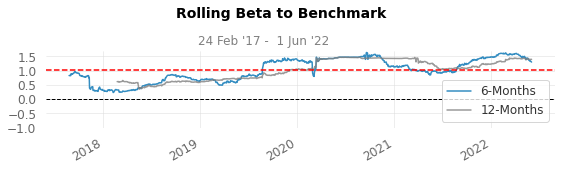

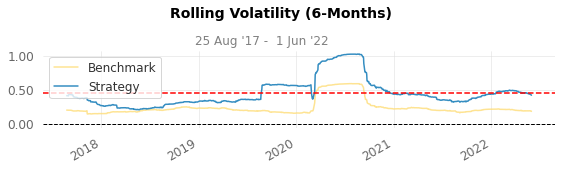

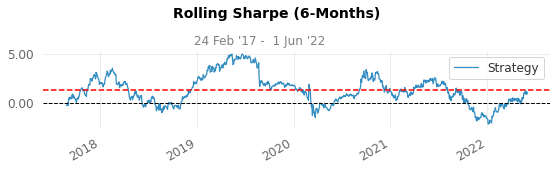

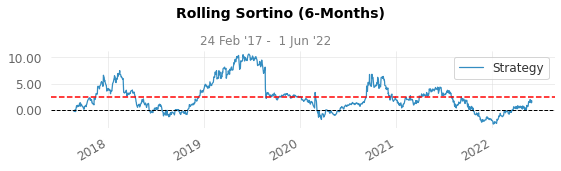

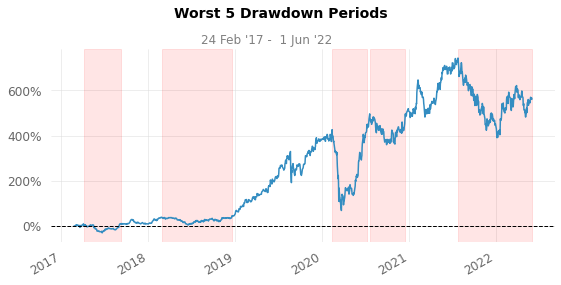

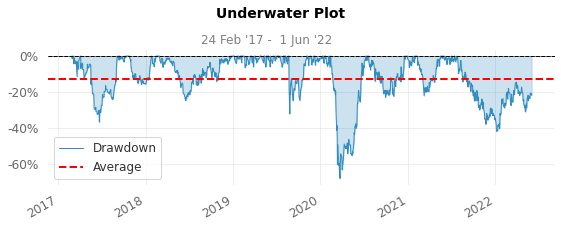

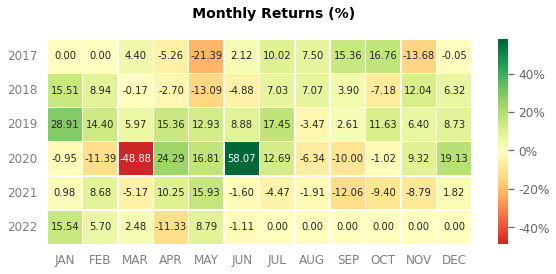

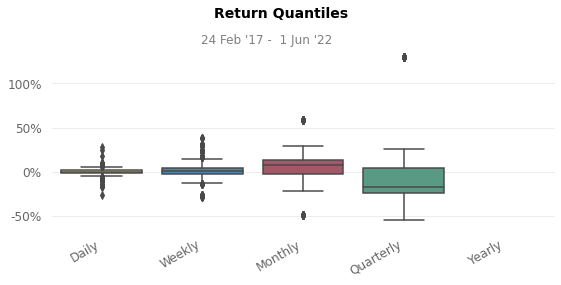

In [40]:
# exemplo de relatório completo
qs.reports.full(BTG, benchmark="^BVSP")

In [41]:
# gerar relatório em um arquivo html
qs.reports.html(BTG, benchmark="^BVSP", output='relatorio.html')

In [42]:
# gerar itens do relatório individualmente
BTG.monthly_returns()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,EOY
2017,0.000000,0.000000,0.043956,-0.052631,-0.213889,0.021202,0.100199,0.075000,0.153611,0.167639,-0.136756,-0.000526,0.144253
2018,0.155079,0.089362,-0.001736,-0.026957,-0.130920,-0.048843,0.070270,0.070700,0.039024,-0.071831,0.120384,0.063206,0.323234
2019,0.289063,0.143967,0.059675,0.153610,0.129290,0.088808,0.174528,-0.034687,0.026117,0.116331,0.063963,0.087300,1.318450
2020,-0.009498,-0.113909,-0.488832,0.242866,0.168142,0.580672,0.126877,-0.063411,-0.099951,-0.010158,0.093191,0.191298,0.534381
2021,0.009801,0.086758,-0.051690,0.102524,0.159346,-0.016042,-0.044732,-0.019092,-0.120647,-0.094000,-0.087859,0.018187,-0.019339
2022,0.155449,0.056988,0.024793,-0.113287,0.087917,-0.011147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214426


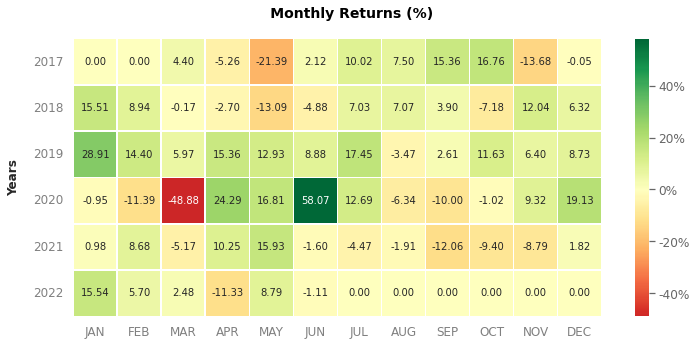

In [43]:
# gerar itens do relatório individualmente
BTG.plot_monthly_heatmap()

In [44]:
# gerar itens do relatório individualmente
BTG.volatility()

0.4904496908393735

In [45]:
# listar todas as features disponíveis
dir(qs.stats)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_ceil',
 '_linregress',
 '_norm',
 '_np',
 '_pd',
 '_sqrt',
 '_utils',
 'adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_square

### Technical Analysis Library (TA)

`ta` é uma biblioteca voltada para a análise de séries temporais financeiras (abertura, fechamento, máxima, mínima e volume).

Pensada para servir como apoio às técnicas de *feature engineering* no contexto do Python, a mesma é construída em cima da conhecida biblioteca `pandas`.

Assim como as anteriores, faz-se necessária sua instalação dentro do ambiente Google Colab.


In [46]:
# instalar ta
!pip install ta -q

In [47]:
# importar ta
import ta

# ou importar apenas aquilo que vamos usar da biblioteca
from ta.volatility import BollingerBands

In [48]:
# baixar dados da BPAC11.SA para exemplo
df = yf.download('BPAC11.SA')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-24,4.5500,4.5500,4.5500,4.5500,3.762056,5200
2017-03-01,4.5500,4.5500,4.4875,4.4875,3.710380,17200
2017-03-02,4.4875,4.4875,4.4875,4.4875,3.710380,0
2017-03-03,4.7500,4.7500,4.6250,4.6875,3.875744,7200
2017-03-06,4.7000,4.8750,4.6250,4.8000,3.968763,22800


Veja um exemplo onde facilmente conseguimos calcular as bandas superior e inferior de Bollinger.

#### Bandas de Bollinger

Como exemplo de aplicação das Bandas de Bollinger, vamos relembrar que elas consistem em três partes: Banda do Meio, Banda Superior e Banda Inferior.

Muito utilizadas quando se busca um indicador de volatilidade de um determinado ativo, elas servem de insumos para o processo decisório de compra ou venda de um papel.



<center><img src="https://origin2.cdn.componentsource.com/sites/default/files/resources/dundas/538216/Documentation/images/BollingerBands.png" height="200px"></center>


Por padrão, é utilizado o valor de 20 períodos para seu cálculo. Mas claro que pode ser alterado de acordo com a análise desejada, sendo o período `n = 20` apenas uma recomendação do próprio Bollinger, criador do indicador.

Matematicamente, os cálculos das Bandas é definido da seguinte maneira, sendo $y$ o valor do Fechamento (`Close`) da cotação.

\begin{align*}
&\mathbf{MA} = \frac{\sum\limits_{i=1}^n y_i}{n}\\
&\mathbf{UpperBB} = MA + D \sqrt{\frac{\sum\limits_{i=1}^n (y_i - MA)^2}{n}}\\
&\mathbf{LowerBB} = MA + D \sqrt{\frac{\sum\limits_{i=1}^n (y_i - MA)^2}{n}}
\end{align*}

Um investidor poderia desejar calcular tais valores, mas observe como tudo se torna muito simples e direto com a biblioteca `ta`.

In [49]:
bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

Agora, basta apenas extrair os cálculos desse indicador. No caso, irei associar cada um deles a uma nova coluna dentro do mesmo DataFrame.

In [50]:
df['bb_bbm'] = bb.bollinger_mavg()
df['bb_bbh'] = bb.bollinger_hband()
df['bb_bbl'] = bb.bollinger_lband()

In [51]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl
Date,,,,,,,,,
2022-05-26,24.680000,25.270000,24.160000,24.950001,24.950001,8986700,23.6605,25.538505,21.782496
2022-05-27,24.940001,25.610001,24.930000,25.200001,25.200001,12984800,23.7660,25.738637,21.793363
2022-05-30,25.440001,25.799999,24.690001,24.900000,24.900000,5234400,23.8570,25.862304,21.851696
2022-05-31,25.170000,25.240000,24.809999,25.120001,25.120001,6008800,23.9810,25.976635,21.985366
2022-06-01,25.490000,25.500000,24.770000,24.840000,24.840000,8514800,24.0720,26.049955,22.094046


De maneira simples, com poucas linhas de código, calculamos os valores das Bandas de Bollinger.

Veja como é simples e direto plotar essas informações diretamente do DataFrame.

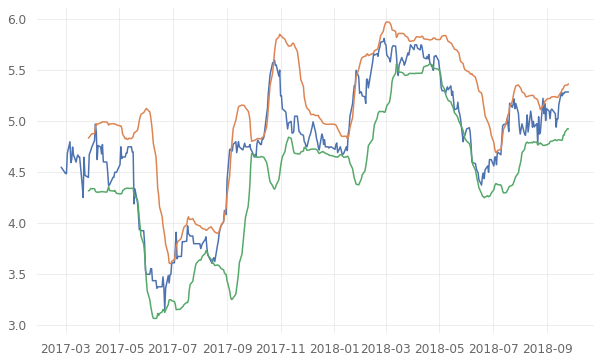

In [52]:
# importar matplotlib
import matplotlib.pyplot as plt

plt.plot(df["Close"][:400])
plt.plot(df["bb_bbh"][:400])
plt.plot(df["bb_bbl"][:400])

A verdade é que existem bibliotecas mais modernas e interativas, mais adequadas para o contexto dos indicadores. Por esse motivo iremos conhecer o `plotly` futuramente.

Seria tedioso percorrermos todas os indicadores presentes na `ta`. Por isso, agora eu te convido a parar a sequência de aulas e acessar a documentação da biblioteca.

Procure e treine neste mesmo notebook, como calcular valores para os indicadores que você mais utiliza.

[Repositório e documentação da biblioteca TA](https://github.com/bukosabino/ta)

In [53]:
import pandas as pd
import ta

In [54]:
df = pd.read_csv("/content/BPAC11.SA.csv", sep=",")

In [55]:
df = ta.utils.dropna(df)

print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [56]:
df = ta.add_all_ta_features(
    df, "Open", "High", "Low", "Close", "Volume", fillna=True
)

print(df.columns)
print(len(df.columns))

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',

/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

import ta

In [58]:
# Load data
df = pd.read_csv("/content/BPAC11.SA.csv", sep=',')
df = ta.utils.dropna(df)

In [59]:
df.shape

(250, 7)

In [60]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-20,29.190001,30.062500,29.030001,29.827499,29.332754,20151600
1,2021-05-21,29.827499,29.920000,29.207500,29.655001,29.163118,11086400
2,2021-05-24,29.777500,30.882500,29.740000,30.642500,30.134235,19749600
3,2021-05-25,30.797501,31.402500,30.450001,30.452499,29.947388,18743600
4,2021-05-26,30.250000,31.200001,30.174999,30.250000,29.748247,24307600


In [61]:
# Add all ta features filling nans values
df = ta.add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume", fillna=True)

/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [62]:
df.shape

(250, 93)

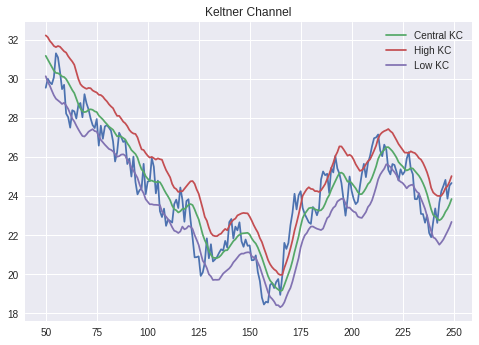

In [63]:
#Plotando Canal de Keltner
plt.plot(df[50: 250].Close)
plt.plot(df[50: 250].volatility_kcc, label='Central KC')
plt.plot(df[50: 250].volatility_kch, label='High KC')
plt.plot(df[50: 250].volatility_kcl, label='Low KC')
plt.title('Keltner Channel')
plt.legend()
plt.show()

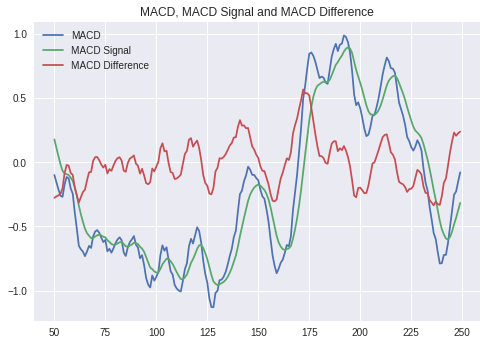

In [64]:
#plotando MACD
plt.plot(df[50: 250].trend_macd, label='MACD')
plt.plot(df[50: 250].trend_macd_signal, label='MACD Signal')
plt.plot(df[50: 250].trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()